In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
df=pd.read_csv("Student_performance.csv")
df.head()

,Study_Hours,Previous_Score,Sleep_Hours,Attendance_Rate,Practice_Tests,Final_Score
0,1.5,45,6.5,65,2,52
1,2.0,50,7.0,70,3,58
2,2.5,48,6.0,68,2,55
3,3.0,55,7.5,75,4,65
4,3.5,52,7.0,72,3,62


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Study_Hours      306 non-null    float64
 1   Previous_Score   306 non-null    int64  
 2   Sleep_Hours      306 non-null    float64
 3   Attendance_Rate  306 non-null    int64  
 4   Practice_Tests   306 non-null    int64  
 5   Final_Score      306 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 14.5 KB


In [47]:
df.duplicated().sum()

np.int64(114)

In [51]:
df1=df.drop_duplicates()

In [52]:
df1

,Study_Hours,Previous_Score,Sleep_Hours,Attendance_Rate,Practice_Tests,Final_Score
0,1.5,45,6.5,65,2,52
1,2.0,50,7.0,70,3,58
2,2.5,48,6.0,68,2,55
3,3.0,55,7.5,75,4,65
4,3.5,52,7.0,72,3,62
...,...,...,...,...,...,...
281,6.5,76,9.7,96,9,96
282,0.9,39,5.6,59,1,46
291,5.2,69,8.9,88,7,85
292,5.7,71,9.2,91,8,89


In [ ]:
#Objective1: Predict Final_Score using Study_Hours

In [53]:
x=df1[['Study_Hours']]
y=df1['Final_Score']

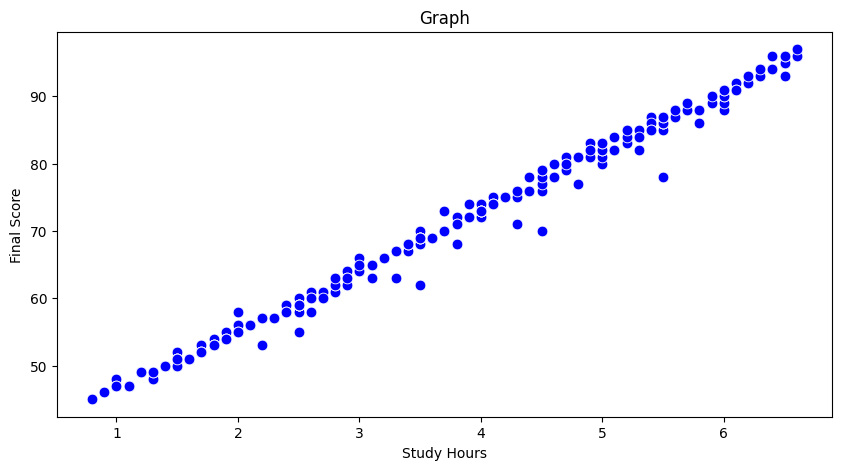

In [55]:
plt.figure(figsize=(10,5))

sns.scatterplot(x='Study_Hours',y='Final_Score',data=df,color="blue",s=60)
plt.xlabel('Study Hours')
plt.ylabel('Final Score')
plt.title('Graph')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [57]:
model=LinearRegression()
model.fit(x,y)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [59]:
y_pred=model.predict(x)
r2=r2_score(y,y_pred)
print("R2 Score for Linear Regression:",r2)

R2 Score for Linear Regression: 0.9900080527010202


In [ ]:
#Objective2: Predict Final_Score using ALL features with polynomial transformation

In [66]:
x=df1.drop('Final_Score',axis=1)
y=df1['Final_Score']

In [73]:
corr=df.corr()

<Axes: >

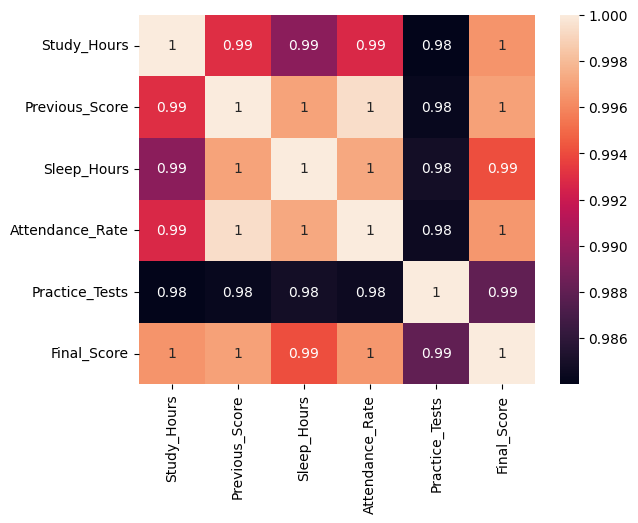

In [76]:
sns.heatmap(corr,annot=True)

In [77]:
from sklearn.preprocessing import PolynomialFeatures
p2=PolynomialFeatures(degree=2)
xp2=p2.fit_transform(x)
l2=LinearRegression()
l2.fit(xp2,y)
yp2=l2.predict(xp2)
r2_2=r2_score(y,yp2)

In [79]:
print("For 2 Degree:",r2_2)

For 2 Degree: 0.998728536133923


In [80]:
p3=PolynomialFeatures(degree=3)
xp3=p3.fit_transform(x)
l3=LinearRegression()
l3.fit(xp3,y)
yp3=l3.predict(xp3)
r2_3=r2_score(y,yp3)

In [81]:
print("For 2 Degree:",r2_3)

For 2 Degree: 0.9992646971895939
